# Loading Custom Modules

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import sys
sys.path.append('C:/Users/hkimr/Desktop/RPS Project/RPS-Deep-Learning/modules')

from DataLoaders import *
from Visualizations import *
from TrainTest import *
from MakeDataset import *

# Creating Custom Dataset

In [2]:
# print("Creating Training Set")
# createDataSet("train")
# print("Creating Testing Set")
# createDataSet("test")

# Defining DataLoaders

## Hyperparameters

In [3]:
batch_size = 150
learning_rate = 0.001
n_epochs = 12
output_neurons = 2
regularization = 0.001
model_name = "Small_Dataset_Test_Ideal_Data"

In [4]:
train_transform = defineDataTransform("train")
test_transform = defineDataTransform("test")

train_loader = createDataLoader("data/test-train", train_transform, batch_size = batch_size)
test_loader = createDataLoader("data/test-test", test_transform, test_loader = True)

## Example Image From Dataset

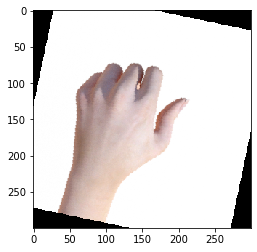

In [5]:
showNumpyAsImg(next(iter(train_loader))[0][0])

# Defining Network Architecture

In [6]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 15)
        self.conv2 = nn.Conv2d(6, 16, 15)
        self.pool = nn.MaxPool2d(5, 5)
        
        self.fc1 = nn.Linear(16*8*8, 300)
        self.fc2 = nn.Linear(300, 100)
        self.fc3 = nn.Linear(100, output_neurons)
        
        self.dropout = nn.Dropout(0.5)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        x = x.view(-1, 16*8*8)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

# Training The Network

In [7]:
model = CNN()
optimizer = optim.Adam(model.parameters(), lr = learning_rate, weight_decay = regularization)
trainNetwork(model, train_loader, n_epochs, optimizer)

Epoch 1, Loss: 2.0764265060424805
Epoch 2, Loss: 2.044272541999817
Epoch 3, Loss: 1.9159660935401917
Epoch 4, Loss: 1.7666723728179932
Epoch 5, Loss: 1.5724903345108032
Epoch 6, Loss: 1.3680612742900848
Epoch 7, Loss: 1.3413529694080353
Epoch 8, Loss: 1.1769618391990662
Epoch 9, Loss: 1.1096136569976807
Epoch 10, Loss: 1.1080976128578186
Epoch 11, Loss: 0.9177467226982117
Epoch 12, Loss: 0.8922747671604156


# Saving The Model

In [8]:
torch.save(model.state_dict(), f'saved_models/{model_name}_{batch_size}BS_{learning_rate}LR_{n_epochs}E')

# Evaluating The Model

In [9]:
model = CNN()
loadModel(model, f'{model_name}_{batch_size}BS_{learning_rate}LR_{n_epochs}E')
evaluateNetwork(model, test_loader)

[[18  0]
 [ 0 24]]
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        18
           1    1.00000   1.00000   1.00000        24

    accuracy                        1.00000        42
   macro avg    1.00000   1.00000   1.00000        42
weighted avg    1.00000   1.00000   1.00000        42

